Sample data for verification:
B_Y1: [-44.42 -44.42 -44.42 -66.89 -66.89]
B_Y2: [-70.63 -70.63 -70.63 -70.63 -87.16]
B_Y3: [-38.79 -38.79 -38.79 -23.03 -23.03]
B_Y4: [-44.34 -44.34 -44.34 -44.34 -26.95]
Shape of B_ma: (4, 3, 2665)
Shape after removing invalid rows: (4, 3, 2665)
[[ 1.  +0.j    0.64+0.j    0.31+0.j  ]
 [ 1.  +0.j   -0.41+0.03j  0.54+0.36j]
 [ 1.  +0.j   -0.49-0.09j -0.28+0.12j]
 [ 1.  +0.j    0.41+0.06j -0.37+0.51j]]


C:\Users\ASUS\anaconda3\envs\my_env\lib\site-packages\nsgt\nsgfwin_sl.py:64: UserWarning:

Q-factor too high for frequencies 0.08,0.08,0.09,0.09,0.10,0.11,0.11,0.12,0.13,0.14,0.15,0.16,0.17,0.18,0.20,0.21

C:\Users\ASUS\anaconda3\envs\my_env\lib\site-packages\nsgt\nsgfwin_sl.py:64: UserWarning:

Q-factor too high for frequencies 0.08,0.08,0.09,0.09,0.10,0.11,0.11,0.12,0.13,0.14,0.15,0.16,0.17,0.18,0.20,0.21

100%|█████████████████████████████████████████████████████████████████████████████| 2689/2689 [00:12<00:00, 222.82it/s]
C:\Users\ASUS\anaconda3\envs\my_env\lib\site-packages\nsgt\nsgfwin_sl.py:64: UserWarning:

Q-factor too high for frequencies 0.08,0.08,0.09,0.09,0.10,0.11,0.11,0.12,0.13,0.14,0.15,0.16,0.17,0.18,0.20,0.21



[[ 1.  +0.j    0.89+0.j    0.98+0.j    0.1 +0.j    0.54+0.j    0.07+0.j  ]
 [ 1.  +0.j   -0.45+0.04j -0.17+0.08j -0.89+0.44j  0.83+0.08j  0.89+0.44j]
 [ 1.  +0.j   -0.02-0.01j  0.01+0.03j  0.  +0.j    0.02+0.01j  0.  +0.01j]
 [ 1.  +0.j    0.11-0.03j  0.02+0.04j  0.02+0.02j -0.12+0.j    0.04+0.05j]]


100%|█████████████████████████████████████████████████████████████████████████████| 2689/2689 [00:12<00:00, 210.82it/s]
C:\Users\ASUS\anaconda3\envs\my_env\lib\site-packages\nsgt\nsgfwin_sl.py:64: UserWarning:

Q-factor too high for frequencies 0.08,0.08,0.09,0.09,0.10,0.11,0.11,0.12,0.13,0.14,0.15,0.16,0.17,0.18,0.20,0.21



[[ 1.  +0.j    0.36+0.j    0.09+0.j  ]
 [ 1.  +0.j    0.61+0.12j -0.31+0.66j]
 [ 1.  +0.j   -0.39-0.01j -0.1 +0.04j]
 [ 1.  +0.j   -0.58+0.05j  0.36+0.57j]]


100%|█████████████████████████████████████████████████████████████████████████████| 2689/2689 [00:12<00:00, 223.44it/s]

B_ubss shape: (3, 2665)


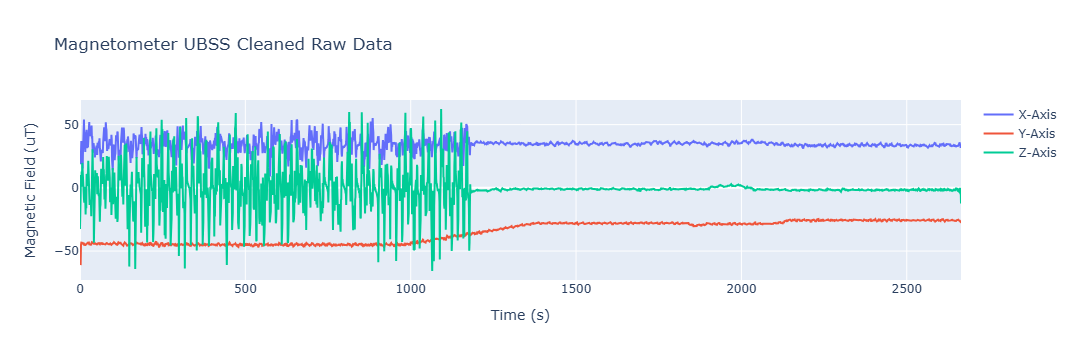

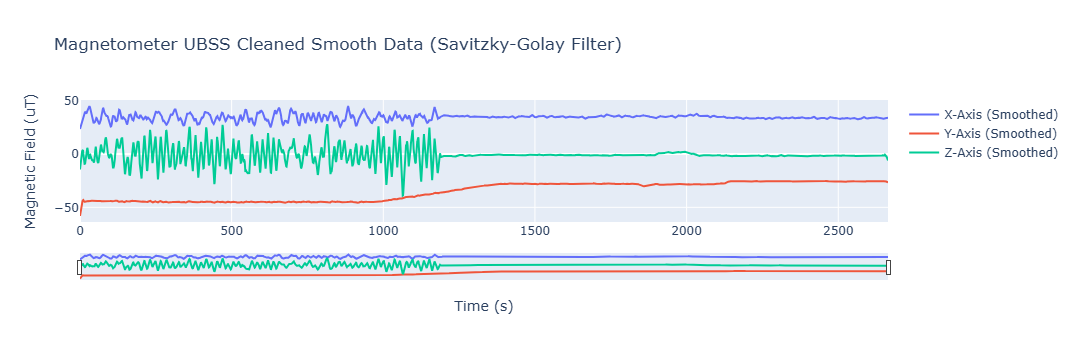

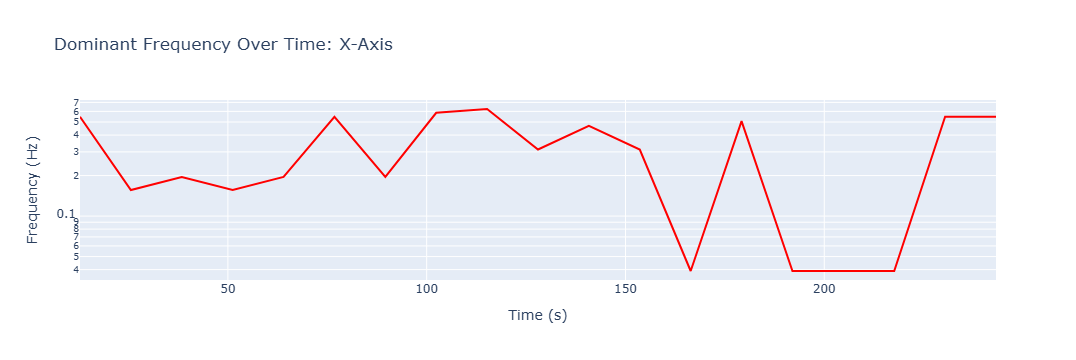

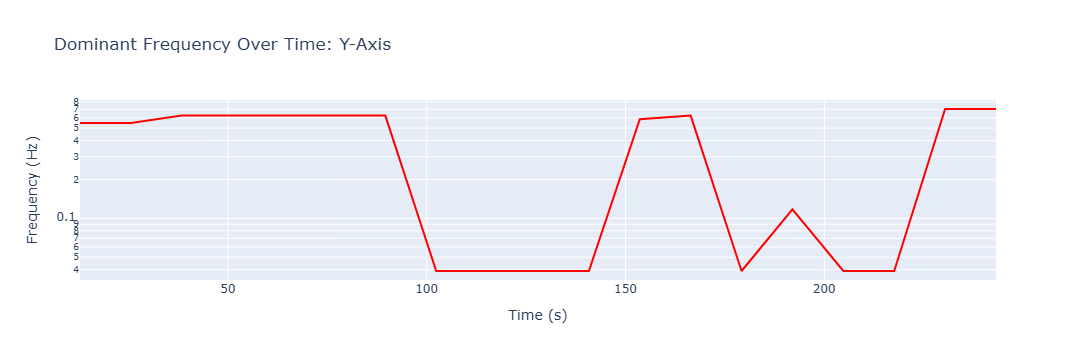

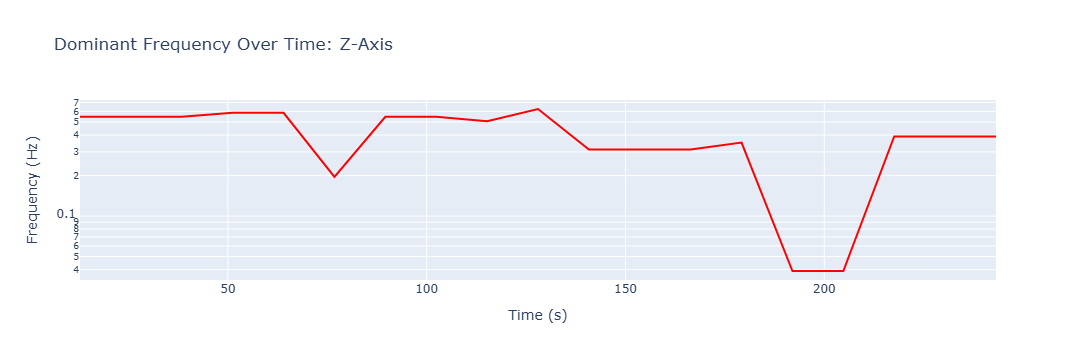

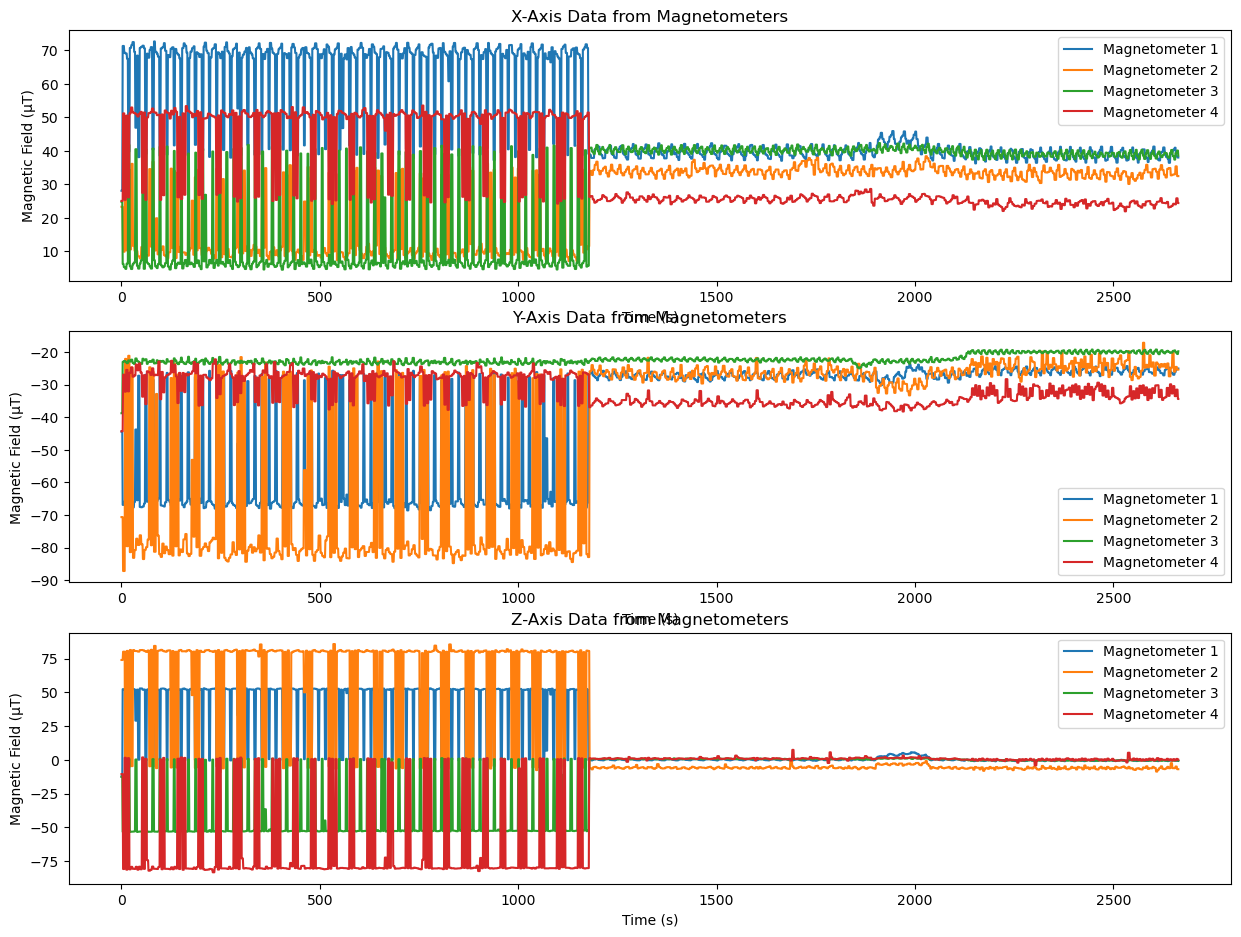

In [15]:
import numpy as np
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import sys
sys.path.append(r'C:\Users\ASUS\Desktop\ubss\MAGPRIME')
from magprime.algorithms import UBSS
from magprime.algorithms import NESS
from magprime.utility import calculate_coupling_coefficients
from scipy import signal
from scipy.signal import savgol_filter

# Function to load data from the .dat file
def load_data(file_path):
    try:
        # Skip the first row (header) and handle comments
        data = np.loadtxt(file_path, usecols=(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11))
    except Exception as e:
        print(f"Error loading data: {e}")
        data = np.array([])  # Return an empty array in case of an error
    return data

# Path to the data file
file_path = r"C:\Users\ASUS\Desktop\ubss\onetq_mag_10_1.txt"

if B.size == 0:
    raise ValueError("Failed to load data or data is empty")
    
# Check for rows with all zeros (likely due to invalid entries)
if not B.any(axis=1).all():
    print("Warning: Some rows contain only zeros due to invalid entries.")

# Load data
B = load_data(file_path)

Ba = B.T  # Transpose to separate columns

# Separate into individual arrays for each magnetometer's X, Y, Z components
B_X1, B_Y1, B_Z1 = Ba[0], Ba[1], Ba[2]
B_X2, B_Y2, B_Z2 = Ba[3], Ba[4], Ba[5]
B_X3, B_Y3, B_Z3 = Ba[6], Ba[7], Ba[8]
B_X4, B_Y4, B_Z4 = Ba[9], Ba[10], Ba[11]

# Print sample data to verify values
print("Sample data for verification:")
print("B_Y1:", B_Y1[:5])
print("B_Y2:", B_Y2[:5])
print("B_Y3:", B_Y3[:5])
print("B_Y4:", B_Y4[:5])


# Stack the data into 2D arrays for each magnetometer (3 x n for each)
B1 = np.vstack((B_X1, B_Y1, B_Z1))
B2 = np.vstack((B_X2, B_Y2, B_Z2))
B3 = np.vstack((B_X3, B_Y3, B_Z3))
B4 = np.vstack((B_X4, B_Y4, B_Z4))

# Stack all magnetometer data into a 3D array: (magnetometers, axes, data points)
# Stack all magnetometer data into a 3D array: (magnetometers, axes, data points)
B_ma = np.stack((B1, B2, B3, B4), axis=0)

# Decimate the data to 0.1 Hz
B_qzs = B_ma[:, :, ::2]
# Plot the data for each axis of the four magnetometers
plt.figure(figsize=(15, 15))

# Plot X-Axis Data from Magnetometers
plt.subplot(4, 1, 1)
plt.title("X-Axis Data from Magnetometers")
plt.plot(B_X1, label="Magnetometer 1")
plt.plot(B_X2, label="Magnetometer 2")
plt.plot(B_X3, label="Magnetometer 3")
plt.plot(B_X4, label="Magnetometer 4")
plt.xlabel("Time (s)")
plt.ylabel("Magnetic Field (µT)")
plt.legend()

# Plot Y-Axis Data from Magnetometers
plt.subplot(4, 1, 2)
plt.title("Y-Axis Data from Magnetometers")
plt.plot(B_Y1, label="Magnetometer 1")
plt.plot(B_Y2, label="Magnetometer 2")
plt.plot(B_Y3, label="Magnetometer 3")
plt.plot(B_Y4, label="Magnetometer 4")
plt.xlabel("Time (s)")
plt.ylabel("Magnetic Field (µT)")
plt.legend()

# Plot Z-Axis Data from Magnetometers
plt.subplot(4, 1, 3)
plt.title("Z-Axis Data from Magnetometers")
plt.plot(B_Z1, label="Magnetometer 1")
plt.plot(B_Z2, label="Magnetometer 2")
plt.plot(B_Z3, label="Magnetometer 3")
plt.plot(B_Z4, label="Magnetometer 4")
plt.xlabel("Time (s)")
plt.ylabel("Magnetic Field (µT)")
plt.legend()


# Verify the shape of the data
if B_ma.shape != (4, 3, B_X1.size):
    raise ValueError("Data shape mismatch. Expected (4, 3, n_samples).")



# Debug: Check shape of B_ma
print(f"Shape of B_ma: {B_ma.shape}")

# Remove invalid rows (if any)
B_ma = B_ma[:, :, B_ma.any(axis=(0, 1))]
print(f"Shape after removing invalid rows: {B_ma.shape}")

# Debug: Check for sufficient samples
if B_ma.shape[2] < 2:
    raise ValueError("Insufficient samples for clustering.")

# Configure UBSS parameters
UBSS.detrend = True
UBSS.sigma = 100  # Adjust based on noise level
UBSS.fs = 10      # Set to the actual sampling frequency
UBSS.cs_iters = 5 # Increase for better convergence
UBSS.bpo = 10     # Increase for higher frequency resolution

# Clean the data using UBSS
B_ubss = UBSS.clean(np.copy(B_ma), triaxial=True)

# Debug: Check the shape of B_ubss
print(f"B_ubss shape: {B_ubss.shape}")

# UBSS cleaned Raw data 

if B_ubss.ndim == 3:
    for i in range(B_ubss.shape[0]):  # Loop over magnetometers
        fig = go.Figure()
        fig.add_trace(go.Scatter(y=B_ubss[i, 0, :], mode='lines', name="X-Axis"))
        fig.add_trace(go.Scatter(y=B_ubss[i, 1, :], mode='lines', name="Y-Axis"))
        fig.add_trace(go.Scatter(y=B_ubss[i, 2, :], mode='lines', name="Z-Axis"))
        fig.update_layout(
            title=f"Magnetometer {i+1}",
            xaxis_title="Time (s)",
            yaxis_title="Magnetic Field (uT)",
            hovermode="x unified"
        )
        fig.show()
else:
    fig = go.Figure()
    fig.add_trace(go.Scatter(y=B_ubss[0, :], mode='lines', name="X-Axis"))
    fig.add_trace(go.Scatter(y=B_ubss[1, :], mode='lines', name="Y-Axis"))
    fig.add_trace(go.Scatter(y=B_ubss[2, :], mode='lines', name="Z-Axis"))
    fig.update_layout(
        title="Magnetometer UBSS Cleaned Raw Data",
        xaxis_title="Time (s)",
        yaxis_title="Magnetic Field (uT)",
        hovermode="x unified"
    )
    fig.show()


# Apply savitzky_Golay filter 
window_length = 21  # Must be odd (e.g., 11, 21, 31)
polyorder = 2       # Polynomial order (e.g., 2 for quadratic, 3 for cubic)
# Create an array to store the smoothed data
B_ubss_smooth = np.zeros_like(B_ubss)

if B_ubss.ndim == 3:
    # Apply the filter to each magnetometer and axis
    for i in range(B_ubss.shape[0]):  # Loop over magnetometers
        for j in range(B_ubss.shape[1]):  # Loop over axes (X, Y, Z)
            B_ubss_smooth[i, j, :] = savgol_filter(B_ubss[i, j, :], window_length, polyorder)
else:
    # Apply the filter to each axis (X, Y, Z)
    for j in range(B_ubss.shape[0]):
        B_ubss_smooth[j, :] = savgol_filter(B_ubss[j, :], window_length, polyorder)



if B_ubss.ndim == 3:
    for i in range(B_ubss.shape[0]):  # Loop over magnetometers
        fig = go.Figure()
        
        # Add smoothed traces
        fig.add_trace(go.Scatter(y=B_ubss_smooth[i, 0, :], mode='lines', name="X-Axis (Smoothed)"))
        fig.add_trace(go.Scatter(y=B_ubss_smooth[i, 1, :], mode='lines', name="Y-Axis (Smoothed)"))
        fig.add_trace(go.Scatter(y=B_ubss_smooth[i, 2, :], mode='lines', name="Z-Axis (Smoothed)"))
        
        # Update layout
        fig.update_layout(
            title=f"Magnetometer {i+1} (Smoothed Data)",
            xaxis_title="Time (s)",
            yaxis_title="Magnetic Field (uT)",
            hovermode="x unified",
            xaxis=dict(
                rangeslider=dict(visible=True),  # Add a range slider for the x-axis
                type="linear"  # Use linear scaling for the x-axis
            ),
            yaxis=dict(
                fixedrange=False  # Allow y-axis to zoom
            )
        )
        fig.show()
else:
    fig = go.Figure()
    
    # Add smoothed traces
    fig.add_trace(go.Scatter(y=B_ubss_smooth[0, :], mode='lines', name="X-Axis (Smoothed)"))
    fig.add_trace(go.Scatter(y=B_ubss_smooth[1, :], mode='lines', name="Y-Axis (Smoothed)"))
    fig.add_trace(go.Scatter(y=B_ubss_smooth[2, :], mode='lines', name="Z-Axis (Smoothed)"))
    
    # Update layout
    fig.update_layout(
        title="Magnetometer UBSS Cleaned Smooth Data (Savitzky-Golay Filter)",
        xaxis_title="Time (s)",
        yaxis_title="Magnetic Field (uT)",
        hovermode="x unified",
        xaxis=dict(
            rangeslider=dict(visible=True),  # Add a range slider for the x-axis
            type="linear"  # Use linear scaling for the x-axis
        ),
        yaxis=dict(
            fixedrange=False  # Allow y-axis to zoom
        )
    )
    fig.show()

# Spectrogram view 

import numpy as np
import plotly.graph_objects as go
from scipy import signal

def plot_frequency_curve(data, fs, axes_labels):
    for i, label in enumerate(axes_labels):
        # Compute the spectrogram
        f, t, Sxx = signal.spectrogram(data[i], fs=fs, nperseg=256, noverlap=128)
        
        # Find the dominant frequency at each time step
        dominant_freq = f[np.argmax(Sxx, axis=0)]
        
        # Create a plot for the dominant frequency curve
        fig = go.Figure()
        
        # Add the dominant frequency curve
        fig.add_trace(go.Scatter(
            x=t,
            y=dominant_freq,
            mode='lines',
            line=dict(color='red', width=2),
            name='Dominant Frequency'
        ))
        
        # Update the layout
        fig.update_layout(
            title=f"Dominant Frequency Over Time: {label}",
            xaxis_title="Time (s)",
            yaxis_title="Frequency (Hz)",
            yaxis_type="log"  # Use logarithmic scale for frequency
        )
        
        # Show the plot
        fig.show()

# Call the function with UBSS-cleaned data
plot_frequency_curve(B_ubss, fs=10, axes_labels=["X-Axis", "Y-Axis", "Z-Axis"])